<a href="https://colab.research.google.com/github/Newball12/tuplas2/blob/main/Taller%201%20corte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adjacency Matrix:
[[  0 415   0   0   0   0   0 310 170   0   0]
 [415   0 300   0   0   0   0   0 317 230   0]
 [  0 300   0 225   0   0   0   0   0 275   0]
 [  0   0 225   0 450   0   0   0   0 198   0]
 [  0   0   0 450   0 255   0   0   0   0   0]
 [  0   0   0   0 255   0 230   0   0 314 180]
 [  0   0   0   0   0 230   0 250   0   0   0]
 [310   0   0   0   0   0 250   0 299   0 450]
 [170 317   0   0   0   0   0 299   0 190 345]
 [  0 230 275 198   0 314   0   0 190   0 180]
 [  0   0   0   0   0 180   0 450 345 180   0]]

Incidence Matrix:
[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 

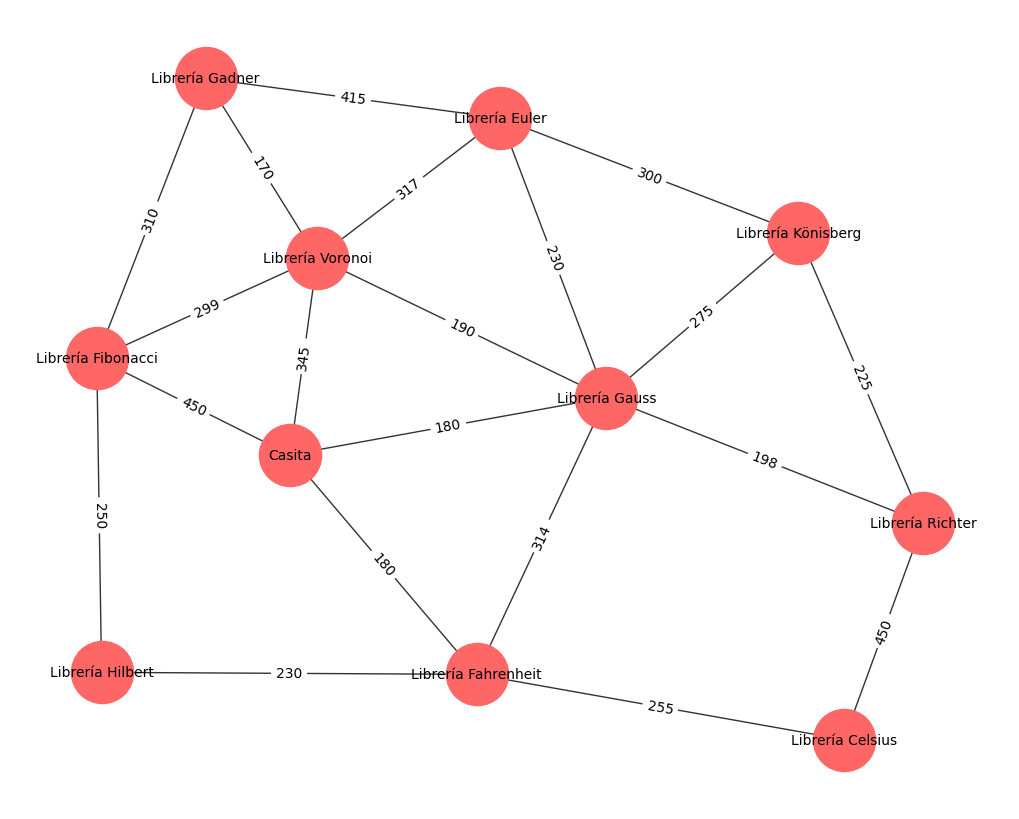

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the libraries (vertices) and distances (edges)
libraries = [
    'Librería Gadner', 'Librería Euler', 'Librería Könisberg', 'Librería Richter',
    'Librería Celsius', 'Librería Fahrenheit', 'Librería Hilbert', 'Librería Fibonacci',
    'Librería Voronoi', 'Librería Gauss', 'Casita'
]

edges = {
    ('Librería Gadner', 'Librería Euler'): 415,
    ('Librería Gadner', 'Librería Voronoi'): 170,
    ('Librería Gadner', 'Librería Fibonacci'): 310,
    ('Librería Euler', 'Librería Voronoi'): 317,
    ('Librería Euler', 'Librería Könisberg'): 300,
    ('Librería Voronoi', 'Casita'): 345,
    ('Librería Voronoi', 'Librería Gauss'): 190,
    ('Librería Könisberg', 'Librería Richter'): 225,
    ('Librería Richter', 'Librería Celsius'): 450,
    ('Librería Celsius', 'Librería Fahrenheit'): 280,
    ('Librería Fahrenheit', 'Librería Hilbert'): 230,
    ('Librería Hilbert', 'Librería Fibonacci'): 250,
    ('Librería Gauss', 'Casita'): 180,
    ('Librería Gauss', 'Librería Richter'): 198,
    ('Casita', 'Librería Fahrenheit'): 180,
    ('Casita', 'Librería Fibonacci'): 450,
    ('Librería Gauss', 'Librería Könisberg'): 275,
    ('Librería Gauss', 'Librería Fahrenheit'): 314,
    ('Librería Fahrenheit', 'Librería Celsius'): 255,
    ('Librería Euler', 'Librería Gauss'): 230,
    ('Librería Fibonacci', 'Librería Voronoi'): 299,
}

# Create Adjacency Matrix
adj_matrix = np.zeros((len(libraries), len(libraries)), dtype=int)
for (lib1, lib2), distance in edges.items():
    i, j = libraries.index(lib1), libraries.index(lib2)
    adj_matrix[i][j] = distance
    adj_matrix[j][i] = distance  # Assuming an undirected graph

print("Adjacency Matrix:")
print(adj_matrix)

# Create Incidence Matrix
inc_matrix = np.zeros((len(libraries), len(edges)), dtype=int)
for idx, ((lib1, lib2), distance) in enumerate(edges.items()):
    i, j = libraries.index(lib1), libraries.index(lib2)
    inc_matrix[i][idx] = 1
    inc_matrix[j][idx] = 1

print("\nIncidence Matrix:")
print(inc_matrix)

# Create a graph for finding the shortest path
G = nx.Graph()
for (lib1, lib2), distance in edges.items():
    G.add_edge(lib1, lib2, weight=distance)

# Find shortest path from Casita to Librería Celsius using Dijkstra's Algorithm
shortest_path = nx.shortest_path(G, source='Casita', target='Librería Celsius', weight='weight')
shortest_distance = nx.shortest_path_length(G, source='Casita', target='Librería Celsius', weight='weight')
print("\nShortest path from Casita to Librería Celsius:", shortest_path)
print("Shortest distance from Casita to Librería Celsius:", shortest_distance)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='#ff6666', edge_color='#333333', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for (u, v, d) in G.edges(data='weight')})
plt.show()
